In [162]:
# Import dependencies

import pandas as pd  
import numpy as nm  
import matplotlib.pyplot as mtp  
from pathlib import Path
from sklearn.linear_model import LinearRegression # Scikit-learn machine learning library

In [163]:
# Read in master CSV
url = "https://raw.githubusercontent.com/samlilburn07/Final_Project/processed_data/final_data.csv"

master_df = pd.read_csv(url)
master_df

,bedrooms,bathrooms,squareFootage,yearBuilt,lotSize,propertyType,price,addressLine1,addressLine2,city,state,zipCode,status,daysOnMarket,latitude,longitude
0,5.0,4.0,7680.0,2010.0,435687.0,Single Family,2200000,18185 Narrow Path Trl,NaN,Doswell,VA,23047,Active,56,37.906134,-77.535539
1,4.0,2.5,2713.0,2022.0,125409.0,Single Family,628900,Horseshoe Bridge Rd,NaN,Doswell,VA,23047,Active,37,37.817704,-77.548959
2,3.0,2.0,1760.0,1952.0,40598.0,Single Family,309900,16180 Short Cut Rd,NaN,Doswell,VA,23047,Active,16,37.847004,-77.463101
3,4.0,3.5,3002.0,2004.0,226643.0,Single Family,550000,13540 Chase Ln,NaN,Doswell,VA,23047,Inactive,32,37.812827,-77.558895
4,4.0,3.5,4274.0,2006.0,479160.0,Single Family,1035000,16085 Rocketts Mill Rd,NaN,Doswell,VA,23047,Inactive,25,37.842011,-77.542870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16506,4.0,2.5,2138.0,NaN,NaN,Single Family,325000,13101 Glenmeadow Ct,NaN,Midlothian,VA,23114,Inactive,403,37.493032,-77.639109
16507,3.0,2.0,1632.0,NaN,NaN,Single Family,307000,913 Krim Point Ln,NaN,Midlothian,VA,23114,Inactive,414,37.487011,-77.655272
16508,4.0,2.5,1867.0,NaN,NaN,Single Family,309000,1318 Sweet Willow Dr,NaN,Midlothian,VA,23114,Inactive,408,37.469868,-77.604671
16509,4.0,2.5,1912.0,NaN,NaN,Single Family,299950,12404 Mcallen Ct,NaN,Midlothian,VA,23114,Inactive,414,37.464500,-77.628494


In [164]:
# Remove unneccesary columns

df = master_df[["zipCode", "propertyType", "squareFootage", "bedrooms", "bathrooms", "price"]]
df

,zipCode,propertyType,squareFootage,bedrooms,bathrooms,price
0,23047,Single Family,7680.0,5.0,4.0,2200000
1,23047,Single Family,2713.0,4.0,2.5,628900
2,23047,Single Family,1760.0,3.0,2.0,309900
3,23047,Single Family,3002.0,4.0,3.5,550000
4,23047,Single Family,4274.0,4.0,3.5,1035000
...,...,...,...,...,...,...
16506,23114,Single Family,2138.0,4.0,2.5,325000
16507,23114,Single Family,1632.0,3.0,2.0,307000
16508,23114,Single Family,1867.0,4.0,2.5,309000
16509,23114,Single Family,1912.0,4.0,2.5,299950


In [165]:
df.dtypes

zipCode            int64
propertyType      object
squareFootage    float64
bedrooms         float64
bathrooms        float64
price              int64
dtype: object

In [166]:
# Remove properties > 1.0M property value

df = df[(df["price"] >= 80000) & (df["price"] <= 1000000)]
df.head()

,zipCode,propertyType,squareFootage,bedrooms,bathrooms,price
1,23047,Single Family,2713.0,4.0,2.5,628900
2,23047,Single Family,1760.0,3.0,2.0,309900
3,23047,Single Family,3002.0,4.0,3.5,550000
5,23047,Single Family,3255.0,3.0,3.0,479900
6,23047,Single Family,2464.0,4.0,4.0,125000


In [167]:
# Count rows with NaN values
df.isnull().sum()

zipCode            0
propertyType       0
squareFootage      7
bedrooms           1
bathrooms        250
price              0
dtype: int64

In [168]:
# Remove rows with null values
clean_df = df.dropna()
print(clean_df.shape)
clean_df

(15876, 6)


,zipCode,propertyType,squareFootage,bedrooms,bathrooms,price
1,23047,Single Family,2713.0,4.0,2.5,628900
2,23047,Single Family,1760.0,3.0,2.0,309900
3,23047,Single Family,3002.0,4.0,3.5,550000
5,23047,Single Family,3255.0,3.0,3.0,479900
6,23047,Single Family,2464.0,4.0,4.0,125000
...,...,...,...,...,...,...
16506,23114,Single Family,2138.0,4.0,2.5,325000
16507,23114,Single Family,1632.0,3.0,2.0,307000
16508,23114,Single Family,1867.0,4.0,2.5,309000
16509,23114,Single Family,1912.0,4.0,2.5,299950


In [169]:
# Extract Independent and Dependent variables

X = clean_df.drop(columns="price", axis=1)
y = clean_df[["price"]]

In [170]:
# Sample View X

X.head()

,zipCode,propertyType,squareFootage,bedrooms,bathrooms
1,23047,Single Family,2713.0,4.0,2.5
2,23047,Single Family,1760.0,3.0,2.0
3,23047,Single Family,3002.0,4.0,3.5
5,23047,Single Family,3255.0,3.0,3.0
6,23047,Single Family,2464.0,4.0,4.0


In [171]:
# Sample View y
y.head()

,price
1,628900
2,309900
3,550000
5,479900
6,125000


In [172]:
# Convert string values to numerical
X = pd.get_dummies(X)
X.head()

,zipCode,squareFootage,bedrooms,bathrooms,propertyType_Condo,propertyType_Manufactured,propertyType_Single Family,propertyType_Townhouse
1,23047,2713.0,4.0,2.5,0,0,1,0
2,23047,1760.0,3.0,2.0,0,0,1,0
3,23047,3002.0,4.0,3.5,0,0,1,0
5,23047,3255.0,3.0,3.0,0,0,1,0
6,23047,2464.0,4.0,4.0,0,0,1,0


In [173]:
# Creating the scaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [174]:
# Fit scaled data
X_scaled = data_scaler.fit_transform(X)

In [175]:
# Split the data into training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [176]:
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [177]:
print(f"Coefficients: {(model.coef_).round(decimals=2)}")
print(f"y-intercept: {(model.intercept_).round(decimals=2)}")

Coefficients: [[   -66.02    139.64 -22117.19  39963.58  14029.78 -59941.83  24807.58
   21104.47]]
y-intercept: [1585098.27]


In [178]:
# Predict outcomes
testPrice = model.predict(X_test).round()
print(testPrice)

[[424684.]
 [277675.]
 [330021.]
 ...
 [377100.]
 [361933.]
 [463523.]]


In [179]:
# Itterate through X and predict prices

predictedPrices = model.predict(X).round()    

In [180]:
#plt.scatter(y_test, predictedPrice)

In [181]:
# Add predictedPrice to clean_df

clean_df["Predicted Price"] = predictedPrices
clean_df.columns = ["Zip Code", "Property Type", "Square Footage", "Bedrooms", "Bathrooms", "Price", "Predicted Price"]
clean_df.head(10)

C:\Users\maron\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Zip Code,Property Type,Square Footage,Bedrooms,Bathrooms,Price,Predicted Price
1,23047,Single Family,2713.0,4.0,2.5,628900,478596.0
2,23047,Single Family,1760.0,3.0,2.0,309900,347649.0
3,23047,Single Family,3002.0,4.0,3.5,550000,558917.0
5,23047,Single Family,3255.0,3.0,3.0,479900,596382.0
6,23047,Single Family,2464.0,4.0,4.0,125000,503769.0
7,23047,Single Family,1056.0,3.0,1.0,259000,209376.0
8,23047,Single Family,2777.0,4.0,2.5,739900,487533.0
9,23047,Single Family,1414.0,3.0,2.0,249950,299332.0
10,23047,Single Family,2043.0,4.0,2.5,395000,385034.0
11,23047,Single Family,1568.0,3.0,2.0,165000,320838.0


In [182]:
# Calculate model statistics

print(f"r-squared: {model.score(X,y).round(decimals=2)}")
# Adjusted r-squared code: https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared
print(f"Adjusted r-squared: {(1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)).round(decimals=2)}")
print(f"Coefficients: {(model.coef_).round(decimals=2)}")
print(f"y-intercept: {(model.intercept_).round(decimals=2)}")

r-squared: 0.71
Adjusted r-squared: 0.71
Coefficients: [[   -66.02    139.64 -22117.19  39963.58  14029.78 -59941.83  24807.58
   21104.47]]
y-intercept: [1585098.27]


<AxesSubplot:title={'center':'Price vs. Predicted Price'}, xlabel='Price', ylabel='Predicted Price'>

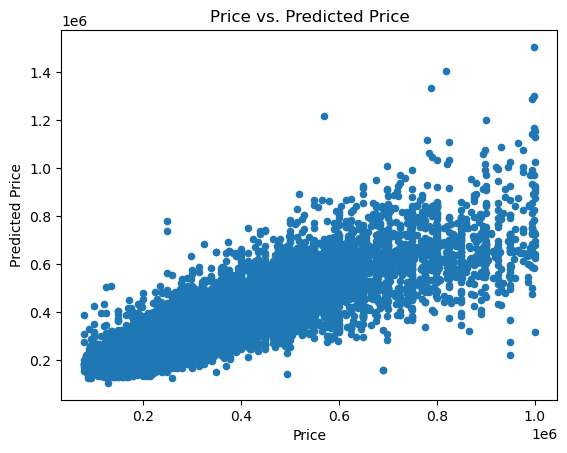

In [183]:
# Scatterplot - price vs. predicted price

clean_df.plot.scatter(x = 'Price', y = 'Predicted Price', title= "Price vs. Predicted Price")

In [184]:
# Summary statistics

print(clean_df.describe())

           Zip Code  Square Footage      Bedrooms     Bathrooms  \
count  15876.000000    15876.000000  15876.000000  15876.000000   
mean   23283.140842     2040.180902      3.446523      2.359064   
std      253.896550      879.237300      0.878209      0.812206   
min    23005.000000      400.000000      0.000000      1.000000   
25%    23114.000000     1406.000000      3.000000      2.000000   
50%    23227.000000     1860.500000      3.000000      2.500000   
75%    23236.250000     2500.000000      4.000000      2.500000   
max    23838.000000    10179.000000      9.000000      7.500000   

                Price  Predicted Price  
count    15876.000000     1.587600e+04  
mean    373272.939846     3.742215e+05  
std     163416.091690     1.376742e+05  
min      80000.000000     1.059280e+05  
25%     259375.000000     2.771720e+05  
50%     340000.000000     3.522890e+05  
75%     449950.000000     4.440125e+05  
max    1000000.000000     1.504654e+06  


                 Zip Code  Square Footage  Bedrooms  Bathrooms     Price  \
Zip Code         1.000000        0.028512  0.058757   0.022010 -0.081088   
Square Footage   0.028512        1.000000  0.710380   0.794059  0.823312   
Bedrooms         0.058757        0.710380  1.000000   0.612721  0.536922   
Bathrooms        0.022010        0.794059  0.612721   1.000000  0.718335   
Price           -0.081088        0.823312  0.536922   0.718335  1.000000   
Predicted Price -0.096652        0.979705  0.639337   0.855276  0.840345   

                 Predicted Price  
Zip Code               -0.096652  
Square Footage          0.979705  
Bedrooms                0.639337  
Bathrooms               0.855276  
Price                   0.840345  
Predicted Price         1.000000  


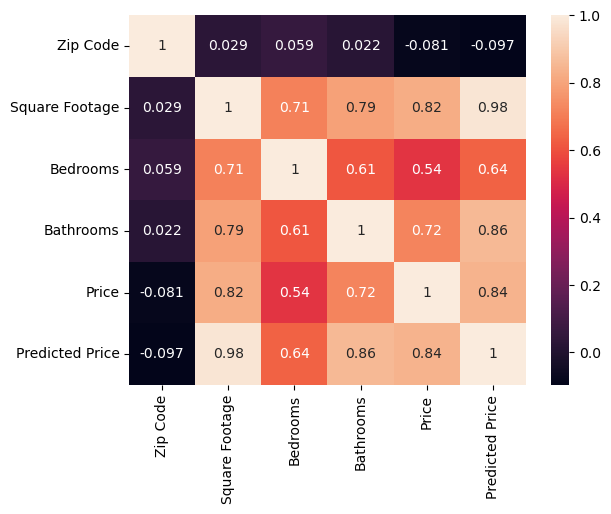

In [185]:
# Correlation matrix

corr_matrix = clean_df.corr()
print(corr_matrix)


# Code found on "https://datatofish.com/correlation-matrix-pandas/""
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corr_matrix, annot=True)
plt.show()

In [187]:
# Convert columns to lists for statistics

actual_listings = clean_df["Price"].tolist()
predicted_listings = clean_df["Predicted Price"].tolist()

In [188]:
# Calculate Error
from sklearn.metrics import mean_squared_error

#mean squared error
mse = mean_squared_error(actual_listings, predicted_listings)
print(f"Mean Squared Error: {mse}") #metric = squared dollars

#root MSE
rmse= mean_squared_error(actual_listings, predicted_listings, squared=False)
print(f"Root Mean Squared Error: {rmse}") #metric = dollars

# absolute mean error
from sklearn.metrics import mean_absolute_error

ame = mean_absolute_error(actual_listings, predicted_listings)
print(f"Absolute Mean Error: {ame}")

Mean Squared Error: 7846950377.396699
Root Mean Squared Error: 88583.01404556462
Absolute Mean Error: 62366.79768203578


In [193]:
# Export final dataframe as CSV

clean_df.to_csv('RMP_MLM_Predictions.csv', index=False, header=True)